# Section 2.2.1: Key Lemmas and identities
This page contains simulations in Section 2.2.1.

## Contents

    - Illustration of Lemma 2.9
    
## Illustration of Lemma 2.9    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

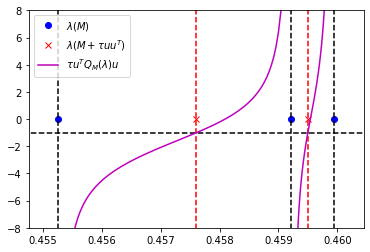

In [47]:
coeff = 2
p = 200*coeff
n = 500*coeff

np.random.seed(828)
X = np.mat(np.random.randn(p,n))

M = X@X.T/n
u = np.mat(np.ones((p,1)))/np.sqrt(p)
tau = 1

M_plus = M + tau*(u@u.T)

d_M = np.sort(np.linalg.eig(M)[0])
d_M_plus = np.sort(np.linalg.eig(M_plus)[0])

eig_index = 100
eig1 = d_M[eig_index-1]
eig2 = d_M[eig_index]
eig3 = d_M[eig_index+1]


Tol = 1e-5
func = lambda l : (tau*u.T @ np.linalg.solve( ( M - l*np.eye(p) ), u )).item()
l_range_12 = np.linspace(eig1+Tol, eig2-Tol,100);
l_range_23 = np.linspace(eig2+Tol, eig3-Tol/2,100);


plt.plot(eig1,0,'bo',label='$\lambda(M)$')
plt.plot(eig2,0,'bo')
plt.plot(eig3,0,'bo')

plt.plot(d_M_plus[eig_index-1],0,'rx',label='$\lambda(M+ \\tau uu^T)$')
plt.plot(d_M_plus[eig_index],0,'rx')

plt.axhline(y=-1,xmin=-8,xmax=8,c='k',ls='--')
plt.axvline(x=eig1,ymin=-8,ymax=8,c='k',ls='--')
plt.axvline(x=eig2,ymin=-8,ymax=8,c='k',ls='--')
plt.axvline(x=eig3,ymin=-8,ymax=8,c='k',ls='--')
plt.axvline(x=d_M_plus[eig_index-1],ymin=-8,ymax=8,c='r',ls='--')
plt.axvline(x=d_M_plus[eig_index],ymin=-8,ymax=8,c='r',ls='--')

plt.plot(l_range_12, [ func(x) for x in l_range_12 ],'m',label='$\\tau u^T Q_M(\lambda) u$')
plt.plot(l_range_23, [ func(x) for x in l_range_23 ],'m')

plt.xlim([eig1-50*Tol,eig3+50*Tol])
plt.ylim([-8,8])

_ = plt.legend()